# VR Survey

This notebook will reproduce some charts related to a survey conducted to understand the point of view of researchers, developers, designers and users in order to target software testing activity at points that these interest groups deem important. 

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#read the csv file
results = pd.read_csv('survey/responses.csv')

# Number of responders by questions:

In [18]:
results.count()

Carimbo de data/hora                                                                                                                      88
How do you rate your profile?                                                                                                             88
How often do you use virtual reality (gaming, graphics) applications?                                                                     88
What VR applications do you use more?                                                                                                     88
Malfunction, or bugs contributes to a negative experience using VR (gaming, graphics) applications. Regarding the above statement you:    88
S2.Visual                                                                                                                                 88
S2.Audio                                                                                                                                  88
S2.Design    

In [20]:
# Do some minor cleanups on the data
# Rename the columns to make it easier to manipulate
# The data comes in through a dictionary so we can not assume order stays the
# same so must name each column

column_names = {'Carimbo de data/hora': 'timestamp',
                'How do you rate your profile?': 'profile',
                'How often do you use virtual reality (gaming, graphics) applications?': 'freq-vr',
                'What VR applications do you use more?': 'most-used-vr',
                'Malfunction, or bugs contributes to a negative experience using VR (gaming, graphics) applications. Regarding the above statement you:': 'bad-experience',
                'S2.Visual': 'annoy-visual',
                'S2.Audio': 'annoy-audio',
                'S2.Design': 'annoy-design',
                'S2.IA': 'annoy-ia',
                'S2.Physics': 'annoy-physics',
                'S2.Stability': 'annoy-stability',
                'S2.Performance': 'annoy-performance',
                'S2.Networking': 'annoy-net', 
                'Technical capabilities of the application (e.g. head tracking, resolution, latency)': 'impeditive-technical',
                'Nausea when using the app': 'impeditive-nausea',
                'Fidelity of virtual world (e.g. how real does it look)': 'impeditive-virtual_world',
                'Awareness of real world (e.g. who is there when using a head mounted display)': 'impeditive-real_world',
                'Interacting with real world objects (e.g. picking up a cup)': 'impeditive-interaction', 
                'Interacting with real world peripherals (e.g. via keyboardmousemotion controllers..)': 'impeditive-peripherals',
                'Providing input to the virtual world (e.g. via peripherals gesture voice etc.)': 'impeditive-inputs',
                'S4.Visual': 'faults-visual',
                'S4.Audio': 'faults-audio',
                'S4.Level Design': 'faults-level_design',
                'S4.IA': 'faults-ia',
                'S4.Physics': 'faults-physiscs',
                'S4.Stability': 'faults-stability',
                'S4.Performance': 'faults-performance',
                'S4.Networking': 'faults-net',
                'Would you like to list a possible flaw fault or bug that was not described in the list above and you judge as critial?': 'faults-other',
                'Enter your e-mail adress if you would like toreceive the compiled search results': 'notify',
                
                }
results.rename(columns=column_names, inplace=True)
results.timestamp = pd.to_datetime(results.timestamp)

## How responders rate theier profile?

In [21]:

results['profile'].value_counts()

User         41
Student      18
Professor    14
Designer      8
Developer     7
Name: profile, dtype: int64

dict_keys(['User', 'Student', 'Professor', 'Designer', 'Developer']) [41, 18, 14, 8, 7]


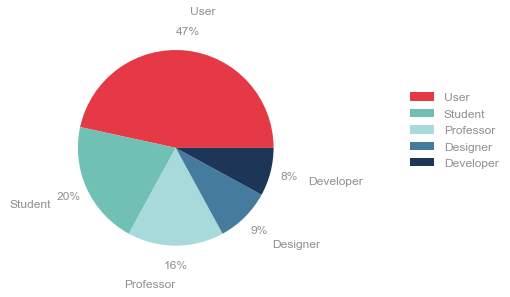

In [22]:
#color_palette_list = ['#DEB4B7', '#BDE3E9', '#9DD9F0', '#D2BDDB','#F6CDE0', '#F3A58B', '#FCF5BF']
color_palette_list = ['#e63946', '#70c1b3', '#a8dadc', '#457b9d', '#1d3557', '#AA17D5', '#F88E0D']

fig, ax = plt.subplots()

plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#909090'
plt.rcParams['axes.labelcolor']= '#909090'
plt.rcParams['xtick.color'] = '#909090'
plt.rcParams['ytick.color'] = '#909090'
plt.rcParams['font.size']=12

#convert results in a dictionary
results_dict = dict(results['profile'].value_counts())

#get the keys and the values of the dict
labels = results_dict.keys()
percentages = [results_dict[l] for l in labels]

print (labels, percentages)

ax.pie(percentages,  labels=labels,  
       colors=color_palette_list, autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=1.2,labeldistance=1.4)

ax.axis('equal')
#ax.set_title("How responders rate theier profile?")
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))

# What VR applications do you use more?

dict_keys(['Gaming', 'Media', 'Simulation', 'Productivity', 'Modelling', 'Therapeutic']) [58, 10, 10, 5, 3, 2]


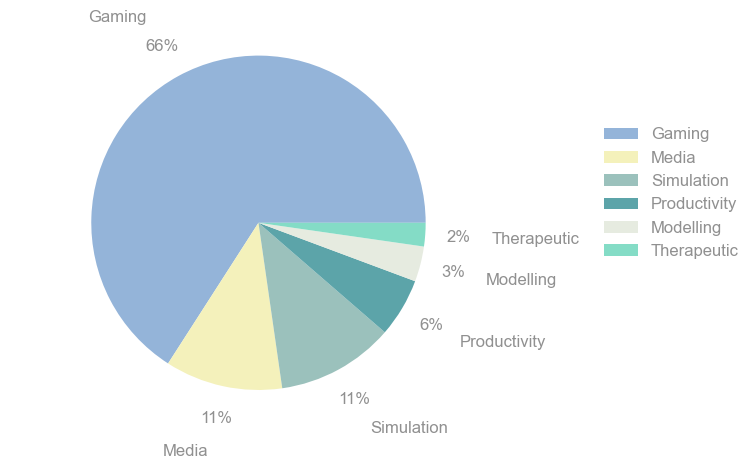

In [26]:
color_palette_list = ['#94B4D9', '#f4f1bb', '#9bc1bc', '#5ca4a9', '#e6ebe0', '#84dcc6']

fig, ax = plt.subplots()

plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#909090'
plt.rcParams['axes.labelcolor']= '#909090'
plt.rcParams['xtick.color'] = '#909090'
plt.rcParams['ytick.color'] = '#909090'
plt.rcParams['font.size']=12

#convert results in a dictionary
results_dict = dict(results['most-used-vr'].value_counts())

#get the keys and the values of the dict
labels = results_dict.keys()
percentages = [results_dict[l] for l in labels]

print (labels, percentages)

ax.pie(percentages,  labels=labels,  
       colors=color_palette_list, autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=1.2,labeldistance=1.4)

ax.axis('equal')
#ax.set_title("How responders rate theier profile?")
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))

# How often do you use VR applications?


dict_keys(['Weekly', 'Monthly', 'Yearly or less often', 'Daily', 'Never']) [26, 25, 22, 14, 1]


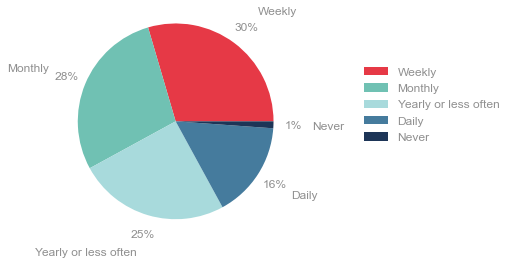

In [23]:
color_palette_list = ['#e63946', '#70c1b3', '#a8dadc', '#457b9d', '#1d3557']

fig, ax = plt.subplots()

plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#909090'
plt.rcParams['axes.labelcolor']= '#909090'
plt.rcParams['xtick.color'] = '#909090'
plt.rcParams['ytick.color'] = '#909090'
plt.rcParams['font.size']=12

#convert results in a dictionary
results_dict = dict(results['freq-vr'].value_counts())

#get the keys and the values of the dict
labels = results_dict.keys()
percentages = [results_dict[l] for l in labels]

print (labels, percentages)

ax.pie(percentages,  labels=labels,  
       colors=color_palette_list, autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=1.2,labeldistance=1.4)

ax.axis('equal')
#ax.set_title("How responders rate theier profile?")
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))

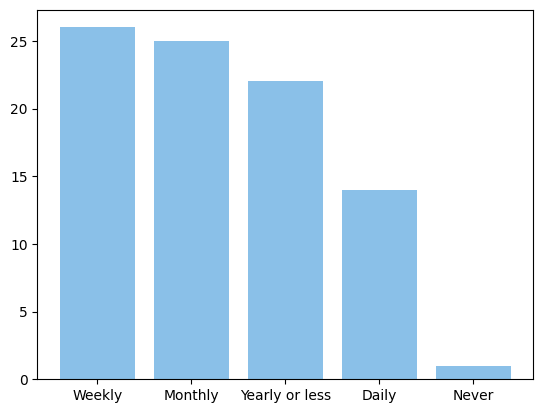

In [24]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('Weekly', 'Monthly', 'Yearly or less', 'Daily', 'Never')
y_pos = np.arange(len(objects))
performance =  [26, 25, 22, 14, 1]

#3C97DA

plt.bar(y_pos, performance, align='center', alpha=0.6, color = '#3C97DA')
plt.xticks(y_pos, objects)
#plt.title('Frequency of using VR applications')

plt.show()

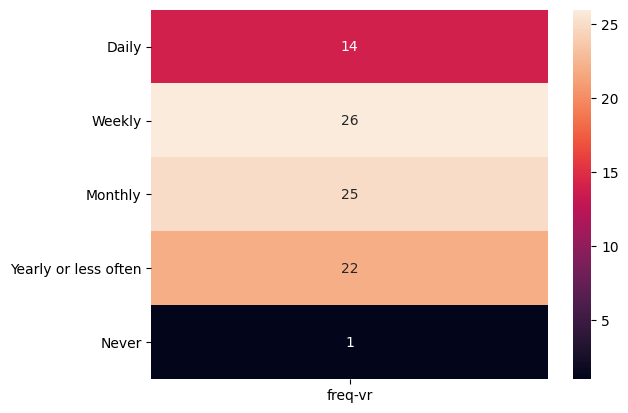

In [25]:
import seaborn as sns

counts = []
counts.append(results['freq-vr'].value_counts())

frame = pd.concat(counts, keys = ['freq-vr'], axis= 1)
frame = frame.reindex(['Daily', 'Weekly', 'Monthly', 'Yearly or less often', 'Never'])

sns.heatmap(frame, annot=True)

# Malfunction, or bugs contributes to a negative experience using VR applications. Regarding the above statement you:

In [10]:
#get the likert scale results
bad_experience = pd.DataFrame(results['bad-experience'])
columns = bad_experience['bad-experience'].unique()

#convert from categorical to numerical
responses = {'Strongly Disagree': 1, 'Disagree': 2, 'Neutral': 3, 'Agree': 4, 'Strongly Agree': 5}
bad_experience['numerical'] = bad_experience['bad-experience'].map(responses)

#define the condition of the likert scale
bad_experience.insert(loc=0, column='condition', value='cond')

#order the title of the columns
columns_titles = ['condition', 'numerical', 'bad-experience']
bad_experience = bad_experience.reindex(columns=columns_titles)

bad_experience.head()


,condition,numerical,bad-experience
0,cond,5,Strongly Agree
1,cond,4,Agree
2,cond,5,Strongly Agree
3,cond,5,Strongly Agree
4,cond,4,Agree


['Strongly Disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly Agree'] [2, 3, 14, 39, 30]


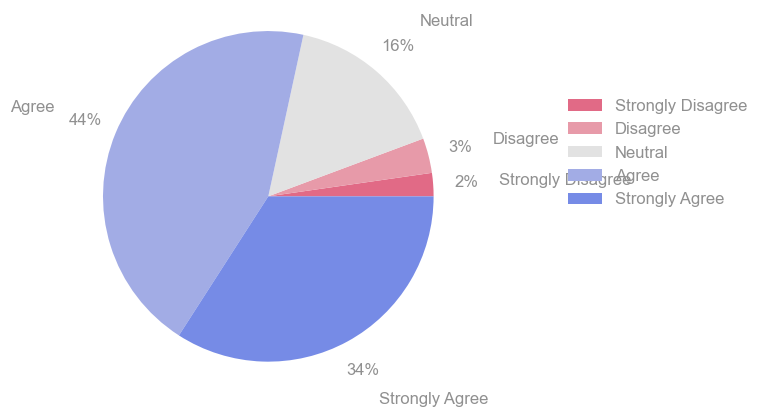

In [11]:
color_palette_list = ['#e16a86', '#e79aa9' , '#e2e2e2', '#a2ace5', '#768be6', ]

fig, ax = plt.subplots()

plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#909090'
plt.rcParams['axes.labelcolor']= '#909090'
plt.rcParams['xtick.color'] = '#909090'
plt.rcParams['ytick.color'] = '#909090'
plt.rcParams['font.size']=12

#convert results in a dictionary
results_dict = dict(results['bad-experience'].value_counts())

#get the keys and the values of the dict
labels = ['Strongly Disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly Agree']
percentages = [results_dict[l] for l in labels]

print (labels, percentages)

ax.pie(percentages,  labels=labels,  
       colors=color_palette_list, autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=1.2,labeldistance=1.4)

ax.axis('equal')
#ax.set_title("How responders rate theier profile?")
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))


# When using VR (gaming, graphics) apps, which of these aspects of their usage or usability that annoy or frustrate you?

In [44]:
dict_remap = {1: 'Very Low', 2: 'Low', 3: 'Regular', 4: 'High', 5: 'Very High'}
results.replace({'annoy-visual', dict_remap})


,timestamp,profile,freq-vr,most-used-vr,bad-experience,annoy-visual,annoy-audio,annoy-design,annoy-ia,annoy-physics,...,faults-visual,faults-audio,faults-level_design,faults-ia,faults-physiscs,faults-stability,faults-performance,faults-net,"Would you like to list a possible flaw, fault or bug that was not described in the list above and you judge as critial?",notify
0,2019-11-27 12:06:07,Professor,Yearly or less often,Gaming,Strongly Agree,5,3,3,3,3,...,"Z-Fighting, Screen tearing","Distorcion, Missing sound fx","Scene hole, Invisible obstacles, Missing geome...",Stuck (unable to move correcly through path),"Object don't break, Problems interacting with ...","Crash, Can't load the app","Low frame rate, Higer loading time","Can't connect / Drop connection, Lag",NaN,NaN
1,2019-11-27 12:20:35,Professor,Monthly,Gaming,Agree,4,4,3,5,2,...,Missing textures,"Distorcion, Volume too high/low","Invisible obstacles, Missing geometry (you can...","Stuck (unable to move correcly through path), ...",Unrealistic gravity,"Freeze, Crash, Can't load the app, Unresponsive",Low frame rate,"Can't connect / Drop connection, Lag, Invisibl...",NaN,NaN
2,2019-11-27 13:37:48,Professor,Yearly or less often,Gaming,Strongly Agree,3,2,4,3,4,...,"Missing textures, Vsible artifacts","Distorcion, Missing sound fx",Invisible obstacles,Don't Move,"Objects floats when it's not supposed to, Obje...","Freeze, Crash, Can't load the app",Low frame rate,NaN,NaN,claudineibjr@hotmail.com
3,2019-11-27 13:42:55,Professor,Yearly or less often,Media,Strongly Agree,5,1,1,1,1,...,Missing textures,Distorcion,Missing geometry (you can see but can't interact),Don't Move,Unrealistic gravity,Crash,Low frame rate,Scoring erros,NaN,NaN
4,2019-11-27 13:46:21,Student,Yearly or less often,Gaming,Agree,4,4,3,1,3,...,Vsible artifacts,"Distorcion, Volume too high/low","Invisible obstacles, Missing geometry (you can...",NaN,Unrealistic gravity,Crash,Low frame rate,Can't connect / Drop connection,NaN,lincoln.mcosta@gmail.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,2020-02-05 10:03:06,Designer,Monthly,Productivity,Neutral,3,4,2,5,4,...,Screen tearing,Missing sound fx,Scene hole,Stuck (unable to move correcly through path),Problems interacting with objects,Freeze,High minimum requirements,Lag,none,none
84,2020-02-05 10:10:34,Designer,Weekly,Gaming,Agree,4,3,4,5,4,...,Clipping,Distorcion,Stick Spot,Stuck (unable to move correcly through path),Problems interacting with objects,Crash,Low frame rate,Invisible players,NaN,NaN
85,2020-02-05 10:24:15,Student,Weekly,Gaming,Agree,2,2,3,4,3,...,"Screen tearing, Missing textures","Audio drops, Distorcion, Missing sound fx, Vol...","Stuck spot, Invisible obstacles, Missing geome...",Stuck (unable to move correcly through path),"Objects floats when it's not supposed to, Prob...","Freeze, Crash, Can't load the app",Low frame rate,"Can't connect / Drop connection, Lag",NaN,NaN
86,2020-02-05 10:44:20,Professor,Weekly,Media,Agree,4,4,5,4,5,...,Clipping,Skiping,Scene hole,Stuck (unable to move correcly through path),Problems interacting with objects,Freeze,Higer loading time,Lag,na,na


In [39]:
"""
'S2.Visual': 'annoy-visual',
'S2.Audio': 'annoy-audio',
'S2.Design': 'annoy-design',
'S2.IA': 'annoy-ia',
'S2.Physics': 'annoy-physics',
'S2.Stability': 'annoy-stability',
'S2.Performance': 'annoy-performance',
'S2.Networking': 'annoy-net', 
"""

annoy_list = []
dict_remap = {1: "Very Low", 2: "Low", 3: "Regular", 4: "High", 5: "Very High"}

for type_annoy in ['annoy-visual', 'annoy-audio', 'annoy-ia', 'annoy-physics', 'annoy-stability', 'annoy-performance', 'annoy-net']:

    #will remap the values (1 to 5) into string
    results.replace(type_annoy, dict_remap)

    #add to the annoy list
    annoy_list.append(results[type_annoy].value_counts())

#frame with the annoy results remaped to a string
frame_annoy = pd.concat(annoy_list, keys = ['Visual', 'Audio', 'Artificial Inteligence', 'Physics', 'Stability', 'Performance', 'Networking'], axis= 1)



frame_annoy


,Visual,Audio,Artificial Inteligence,Physics,Stability,Performance,Networking
1,9,18,14,14,8,5,21
2,10,21,14,14,7,4,16
3,14,22,25,21,18,18,20
4,35,19,25,28,29,24,20
5,20,8,10,11,26,37,11


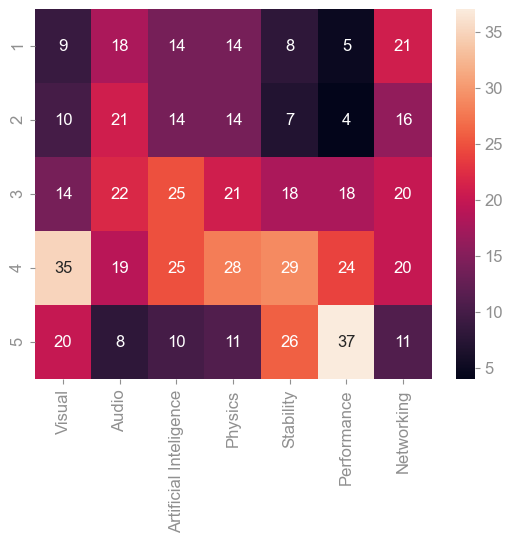

In [34]:
import seaborn as sns
sns.heatmap(frame_annoy, annot=True)